## Question 1:
Report the dimensions of the TF-IDF matrix you get.

In [1]:
import numpy as np 
np.random.seed(42) 
import random
random.seed(42)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics', 'comp.sys.mac.hardware', 'comp.os.ms-windows.misc', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset = 'all', categories = categories)

vectorizer = CountVectorizer(min_df=3, stop_words='english')
X = vectorizer.fit_transform(dataset.data)

In [2]:
# TF-IDF matrices of the train subsets
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

X_tfidf = tfidf.fit_transform(X)

print("The data's shape is", X_tfidf.shape)

The data's shape is (7882, 27768)


## Question 2:
Report the contingency table of your clustering result.

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=1000, n_init=30, random_state=0)
km.fit(X_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [4]:
from sklearn.metrics.cluster import contingency_matrix

class_names = ['Computer', 'Recreation']
true_label = [int(x / 4) ^ 1 for x in dataset.target]

print(contingency_matrix(true_label, km.labels_))

[[1718 2261]
 [   4 3899]]


## Question 3:
Report the 5 measures above for the K-means clustering results you get.

In [5]:
from sklearn.metrics.cluster import homogeneity_score,\
                                    completeness_score,\
                                    v_measure_score,\
                                    adjusted_rand_score,\
                                    adjusted_mutual_info_score

In [6]:
print("The homogeneity score is:", homogeneity_score(true_label, km.labels_))
print("The completeness_score score is:", completeness_score(true_label, km.labels_))
print("The V-measure score is:", v_measure_score(true_label, km.labels_))
print("The adjusted Rand Index score is:", adjusted_rand_score(true_label, km.labels_))
print("The adjusted mutual information score is:", adjusted_mutual_info_score(true_label, km.labels_))

The homogeneity score is: 0.2535958928926043
The completeness_score score is: 0.334815748824373
The V-measure score is: 0.28860033608397917
The adjusted Rand Index score is: 0.18076179588914554
The adjusted mutual information score is: 0.25352755133060884


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


## Question 4:
Report the plot of the percent of variance the top r principle components can retain v.s. r, for r = 1 to 1000.

In [7]:
from sklearn.decomposition import TruncatedSVD

r = 1000
svd = TruncatedSVD(1000)
svd.fit(X_tfidf)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

In [8]:
import matplotlib.pyplot as plt

ratio = svd.explained_variance_ratio_.cumsum()
x = np.array(range(1, 1001))

plt.plot(x, ratio)
plt.title('Percent of the Variance - Rank')
plt.xlabel('Rank')
plt.ylabel('Percent of the Variance')
plt.show()

<Figure size 640x480 with 1 Axes>

## Question 5:
Let r be the dimension that we want to reduce the data to (i.e. n_components). 

Try r = 1,2,3,5,10,20,50,100,300, and plot the 5 measure scores v.s. r for both SVD and NMF. 

Report the best r choice for SVD and NMF respectively. 

Note: what is “best” after all? What if some measures contradict with each other? Here you are faced with this challenge that you need to decide which measure you value the most, and design your own standard of “best”. Please explain your standard and justify it.

### SVD

In [12]:
# use SVD to reduce dimension and find best rank

homogeneity_scores = []
completeness_scores = []
v_measure_scores = []
adjusted_rand_index_scores = []
adjusted_mutual_info_scores = []
rank_list = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for r in rank_list:
    X_reduced = svd.transform(X_tfidf)[:,0:r]
    clt = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(X_reduced)
    homogeneity_scores.append(homogeneity_score(true_label, clt.labels_))
    completeness_scores.append(completeness_score(true_label, clt.labels_))
    v_measure_scores.append(v_measure_score(true_label, clt.labels_))
    adjusted_rand_index_scores.append(adjusted_rand_score(true_label, clt.labels_))
    adjusted_mutual_info_scores.append(adjusted_mutual_info_score(true_label, clt.labels_))
    
    print('-' * 20, "result for rank =", r, '-' * 20)
    print("Homogeneity score: ", homogeneity_score(true_label, clt.labels_))
    print("Completeness score: ", completeness_score(true_label, clt.labels_))
    print("V-measure score: ", v_measure_score(true_label, clt.labels_))
    print("Adjusted rand index score: ", adjusted_rand_score(true_label, clt.labels_))
    print("Adjusted mutual information score: ", adjusted_mutual_info_score(true_label, clt.labels_))

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 1 --------------------
Homogeneity score:  0.0003003030178761853
Completeness score:  0.0003047688479979988
V-measure score:  0.0003025194525487269
Adjusted rand index score:  0.00033904080274629444
Adjusted mutual information score:  0.00020877974994934888


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 2 --------------------
Homogeneity score:  0.5960249753578137
Completeness score:  0.5971396831400697
V-measure score:  0.5965818085440118
Adjusted rand index score:  0.6972989204562027
Adjusted mutual information score:  0.5959879913066645


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 3 --------------------
Homogeneity score:  0.4164457136347125
Completeness score:  0.4506183461160515
V-measure score:  0.4328586258762355
Adjusted rand index score:  0.4199087300516852
Adjusted mutual information score:  0.416392287513305


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 5 --------------------
Homogeneity score:  0.22169446004255983
Completeness score:  0.30996400619493775
V-measure score:  0.25850167861455114
Adjusted rand index score:  0.14515583921549685
Adjusted mutual information score:  0.2216231954089647


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 10 --------------------
Homogeneity score:  0.23391481037641562
Completeness score:  0.32068405497161595
V-measure score:  0.27051173233956144
Adjusted rand index score:  0.15699331100274733
Adjusted mutual information score:  0.23384466542555024


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 20 --------------------
Homogeneity score:  0.2353359981753197
Completeness score:  0.32175401671564835
V-measure score:  0.2718422540943059
Adjusted rand index score:  0.15860666758469216
Adjusted mutual information score:  0.23526598345354635


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 50 --------------------
Homogeneity score:  0.24036931129115102
Completeness score:  0.32481406685458625
V-measure score:  0.2762831907890341
Adjusted rand index score:  0.16534887546071145
Adjusted mutual information score:  0.24029975786004792


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 100 --------------------
Homogeneity score:  0.2459136851918752
Completeness score:  0.32972145379678475
V-measure score:  0.28171670663624065
Adjusted rand index score:  0.17075973241529788
Adjusted mutual information score:  0.2458446396949744
-------------------- result for rank = 300 --------------------
Homogeneity score:  0.24740213963370916
Completeness score:  0.33013026431904685
V-measure score:  0.2828410430007851
Adjusted rand index score:  0.17349778539125787
Adjusted mutual information score:  0.24733323059218043


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0, 0.5, 'scores')

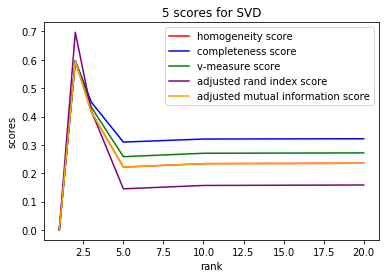

In [14]:
plt.title("5 scores for SVD")
plt.plot(rank_list[0:6], homogeneity_scores[0:6], color="red", label="homogeneity score")
plt.plot(rank_list[0:6], completeness_scores[0:6], color="blue", label="completeness score")
plt.plot(rank_list[0:6], v_measure_scores[0:6], color="green", label="v-measure score")
plt.plot(rank_list[0:6], adjusted_rand_index_scores[0:6], color="purple", label="adjusted rand index score")
plt.plot(rank_list[0:6], adjusted_mutual_info_scores[0:6], color="orange", label="adjusted mutual information score")
plt.legend(loc="upper right")
plt.xlabel("rank")
plt.ylabel("scores")

In [16]:
# use NMF to reduce dimension and find best rank

from sklearn.decomposition import NMF

homogeneity_scores_nmf = []
completeness_scores_nmf = []
v_measure_scores_nmf = []
adjusted_rand_index_scores_nmf = []
adjusted_mutual_info_scores_nmf = []
rank_list = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for r in rank_list:
    nmf = NMF(n_components=r)
    X_nmf_reduced = nmf.fit_transform(X_tfidf)
    
    clt = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(X_nmf_reduced)
    homogeneity_scores_nmf.append(homogeneity_score(true_label, clt.labels_))
    completeness_scores_nmf.append(completeness_score(true_label, clt.labels_))
    v_measure_scores_nmf.append(v_measure_score(true_label, clt.labels_))
    adjusted_rand_index_scores_nmf.append(adjusted_rand_score(true_label, clt.labels_))
    adjusted_mutual_info_scores_nmf.append(adjusted_mutual_info_score(true_label, clt.labels_))
    
    print('-' * 20, "result for rank =", r, '-' * 20)
    print("Homogeneity score: ", homogeneity_score(true_label, clt.labels_))
    print("Completeness score: ", completeness_score(true_label, clt.labels_))
    print("V-measure score: ", v_measure_score(true_label, clt.labels_))
    print("Adjusted rand index score: ", adjusted_rand_score(true_label, clt.labels_))
    print("Adjusted mutual information score: ", adjusted_mutual_info_score(true_label, clt.labels_))

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 1 --------------------
Homogeneity score:  0.0003003030178761853
Completeness score:  0.0003047688479979988
V-measure score:  0.0003025194525487269
Adjusted rand index score:  0.00033904080274629444
Adjusted mutual information score:  0.00020877974994934888


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 2 --------------------
Homogeneity score:  0.6790483562300401
Completeness score:  0.6801316092104511
V-measure score:  0.6795895510492935
Adjusted rand index score:  0.7770177788377391
Adjusted mutual information score:  0.6790189730005428


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 3 --------------------
Homogeneity score:  0.22934270331135687
Completeness score:  0.3164839569386385
V-measure score:  0.2659572773735104
Adjusted rand index score:  0.15279745011356483
Adjusted mutual information score:  0.2292721394788808


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 5 --------------------
Homogeneity score:  0.1806306858119277
Completeness score:  0.2787087965375742
V-measure score:  0.2191989280037279
Adjusted rand index score:  0.10195567187855815
Adjusted mutual information score:  0.180555656934245


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 10 --------------------
Homogeneity score:  0.18667569215124882
Completeness score:  0.28417895409778
V-measure score:  0.2253319718670206
Adjusted rand index score:  0.10720979808549169
Adjusted mutual information score:  0.18660121742351057


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 20 --------------------
Homogeneity score:  0.18193492013962
Completeness score:  0.26780498891159743
V-measure score:  0.21667225118362626
Adjusted rand index score:  0.11413398537860678
Adjusted mutual information score:  0.18186001280292877


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 50 --------------------
Homogeneity score:  0.011832197188032795
Completeness score:  0.07531836949532314
V-measure score:  0.020451543430295923
Adjusted rand index score:  0.0019441736905535516
Adjusted mutual information score:  0.011741494087493415


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


-------------------- result for rank = 100 --------------------
Homogeneity score:  0.031491796685430014
Completeness score:  0.15711387564419096
V-measure score:  0.05246712007261017
Adjusted rand index score:  0.002688756348610146
Adjusted mutual information score:  0.03140296500783613
-------------------- result for rank = 300 --------------------
Homogeneity score:  0.03477298524243016
Completeness score:  0.11833131573454173
V-measure score:  0.05375071855588762
Adjusted rand index score:  0.009594156649875797
Adjusted mutual information score:  0.03468452632245759


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0, 0.5, 'scores')

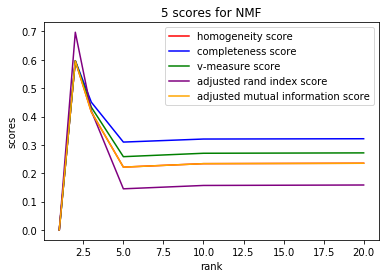

In [17]:
plt.title("5 scores for NMF")
plt.plot(rank_list[0:6], homogeneity_scores[0:6], color="red", label="homogeneity score")
plt.plot(rank_list[0:6], completeness_scores[0:6], color="blue", label="completeness score")
plt.plot(rank_list[0:6], v_measure_scores[0:6], color="green", label="v-measure score")
plt.plot(rank_list[0:6], adjusted_rand_index_scores[0:6], color="purple", label="adjusted rand index score")
plt.plot(rank_list[0:6], adjusted_mutual_info_scores[0:6], color="orange", label="adjusted mutual information score")
plt.legend(loc="upper right")
plt.xlabel("rank")
plt.ylabel("scores")

## Question 7: Visualize Clustering Results

### SVD with its best rank 2

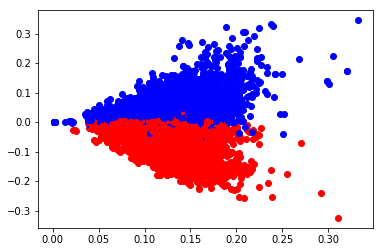

In [18]:
X_reduced_svd = svd.transform(X_tfidf)[:,0:2]

for i in range(len(true_label)):
    point = X_reduced_svd[i]
    if(true_label[i] == 0):
        plt.plot(point[0], point[1], 'ro', color="red")
    else:
        plt.plot(point[0], point[1], 'ro', color="blue")

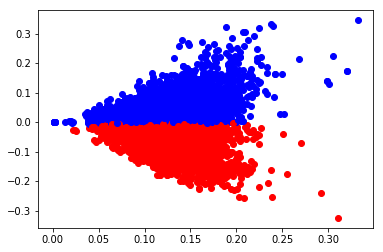

In [19]:
clt_svd_best = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(X_reduced_svd)

for i in range(len(true_label)):
    point = X_reduced_svd[i]
    if(clt_svd_best.labels_[i] == 0):
        plt.plot(point[0], point[1], 'ro', color="red")
    else:
        plt.plot(point[0], point[1], 'ro', color="blue")

### NMF with its best rank 2

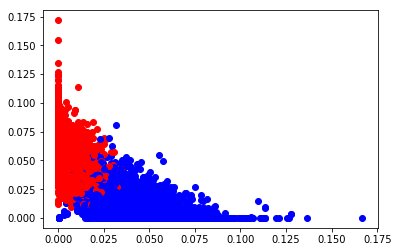

In [20]:
nmf_best = NMF(n_components=2)
X_reduced_nmf = nmf_best.fit_transform(X_tfidf)

for i in range(len(true_label)):
    point = X_reduced_nmf[i]
    if(true_label[i] == 0):
        plt.plot(point[0], point[1], 'ro', color="red")
    else:
        plt.plot(point[0], point[1], 'ro', color="blue")

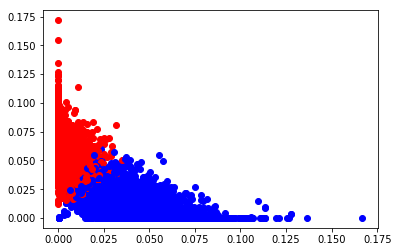

In [21]:
clt_nmf_best = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(X_reduced_nmf)

for i in range(len(true_label)):
    point = X_reduced_nmf[i]
    if(clt_svd_best.labels_[i] == 0):
        plt.plot(point[0], point[1], 'ro', color="red")
    else:
        plt.plot(point[0], point[1], 'ro', color="blue")